In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from docker_manager import *
from collections import defaultdict

In [2]:
path = '../experiments/'
pd.set_option('precision', 4)

In [25]:
df = pd.read_csv(path + 'rnd_img_stars.csv')

In [26]:
df.head()

,iter,image_id,target,ispopular
0,0,0,16.0,0
1,0,1,104.5,0
2,0,2,19.0,0
3,0,3,42.5,0
4,0,4,26.0,0


In [27]:
ispopular = list()
target = list()
for iter_id in df['iter'].unique():
    dfi = df[df['iter'] == iter_id]
    ispopular.append(dfi['ispopular'])
    target.append(np.median(dfi['target']))

In [28]:
np.mean(ispopular), np.std(ispopular)

(0.064519999999999994, 0.24567696188287583)

In [29]:
np.mean(target), np.std(target)

(37.350000000000001, 9.4022603665288909)

In [16]:
dr = df[['image_id', 'target', 'ispopular']].groupby(['image_id']).agg(np.mean).reset_index()

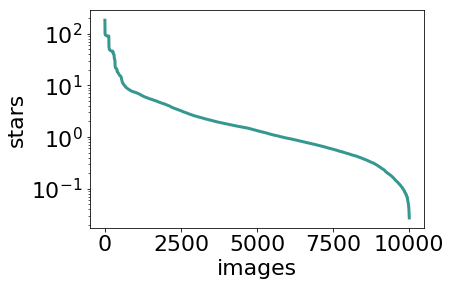

In [30]:
pulls = dr['target']

plt.plot(sorted(pulls, reverse=True), lw=3, color='#35978f')
plt.yscale('log')

#xticks = np.arange(0, 10000+100, 2500)
#plt.xticks(xticks, ['%.1f' % t for t in xticks / len(pulls)])

plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('images', fontsize=22)
plt.ylabel('stars', fontsize=22)

plt.legend(loc='best', bbox_to_anchor=(1.0, 1.15), fontsize=22, ncol=4, columnspacing=0.5, labelspacing=0.1, 
               handlelength=0.5, borderpad=0, handletextpad=0.5)

plt.savefig('../fig/rnd_distr_stars.png', format='png', bbox_inches='tight')
plt.show()